In [4]:
def AverageFluxInFilter(spectrum_wavelength, spectrum_flux, filter_wavelength, filter_transmission):
    from scipy.interpolate import interp1d
    import numpy as np
    ### We need to interpolate the spectrum's flux array onto the filter's wavelength array 
    # so they can be multiplied:
    # First cut off areas of spectrum outside the filter curve to avoid interpolation errors:
    ind = np.where((spectrum_wavelength > np.min(filter_wavelength)) &
                   (spectrum_wavelength < np.max(filter_wavelength)))[0]
    # Make interpolation function:
    interpfunc = interp1d(spectrum_wavelength[ind],spectrum_flux[ind], fill_value="extrapolate")
    # interpolate the spectrum's flux on the filter's wavelength array:
    flux_on_filter_wavelength_grid = interpfunc(filter_wavelength)
    # Multiply flux by filter transmission:
    filter_times_flux = flux_on_filter_wavelength_grid * filter_transmission

    # compute dlambda
    dl = np.mean([filter_wavelength[i] - filter_wavelength[i-1] for i in range(1,len(filter_wavelength))])

    # Compute weighted average:
    filter_weighted_average = np.sum(filter_times_flux * filter_wavelength * dl) / \
            np.sum(filter_transmission * filter_wavelength * dl)
    return filter_weighted_average

In [3]:
vega = pd.read_csv('/Users/loganpearce/Dropbox/astro_packages/myastrotools/myastrotools/vega.csv')
import pickle

pickles = pickle.load(open('pickle_models.pkl','rb'))
spts = [key for key in pickles.keys()]


In [5]:
import pandas as pd
# Get MagAOX filter curves:
directory = '/Users/loganpearce/Dropbox/Uarizona/research/filter_curves/'
#magaox_sci2-gp_bs-65-35_scibs-5050.dat
file = 'magaox_sci1-zp_bs-65-35_scibs-5050.dat'
zfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
zfilter['normalized transmission'] = zfilter['transmission']/np.max(zfilter['transmission'])

file = 'magaox_sci2-ip_bs-65-35_scibs-5050.dat'
ifilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
ifilter['normalized transmission'] = ifilter['transmission']/np.max(ifilter['transmission'])

file = 'magaox_sci1-rp_bs-65-35_scibs-5050.dat'
rfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
rfilter['normalized transmission'] = rfilter['transmission']/np.max(rfilter['transmission'])

file = 'magaox_sci2-gp_bs-65-35_scibs-5050.dat'
gfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
gfilter['normalized transmission'] = gfilter['transmission']/np.max(gfilter['transmission'])
MagAOXfilters = [zfilter, ifilter, rfilter, gfilter]

In [6]:
# Get Sloan filter curves:
file = 'SDSS_z.dat'
SDSSzfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSzfilter['normalized transmission'] = SDSSzfilter['transmission']/np.max(SDSSzfilter['transmission'])

file = 'SDSS_i.dat'
SDSSifilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSifilter['normalized transmission'] = SDSSifilter['transmission']/np.max(SDSSifilter['transmission'])

file = 'SDSS_r.dat'
SDSSrfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSrfilter['normalized transmission'] = SDSSrfilter['transmission']/np.max(SDSSrfilter['transmission'])

file = 'SDSS_g.dat'
SDSSgfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSgfilter['normalized transmission'] = SDSSgfilter['transmission']/np.max(SDSSgfilter['transmission'])
SDSSfilters = [SDSSzfilter, SDSSifilter, SDSSrfilter, SDSSgfilter]

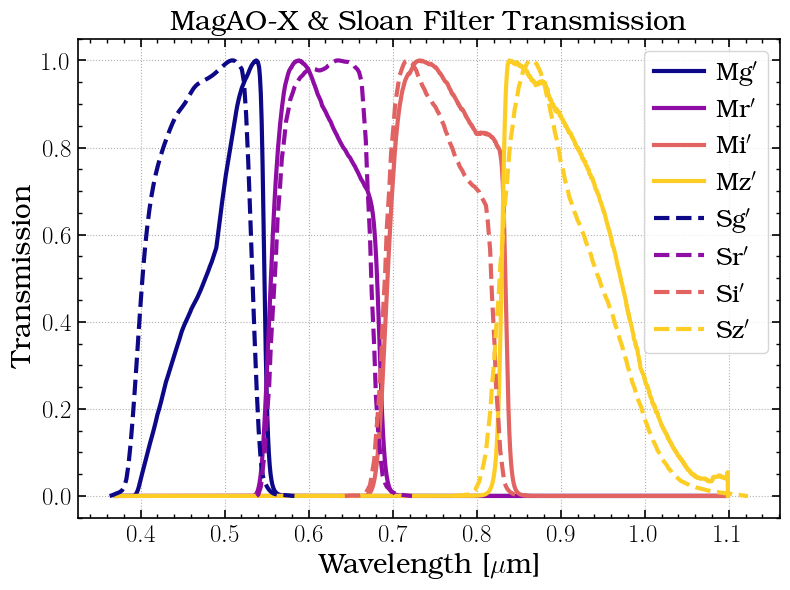

In [31]:

SDSS_filternames = ['Sz$^\prime$','Si$^\prime$','Sr$^\prime$','Sg$^\prime$']
MagAOX_filternames = ['Mz$^\prime$','Mi$^\prime$','Mr$^\prime$','Mg$^\prime$']


%matplotlib inline
plt.style.use('erid')
import matplotlib
cmap = matplotlib.colormaps.get_cmap('plasma')
colors = cmap(np.linspace(0,0.9,4))
plt.plot(gfilter['wavelength [m]']*u.m.to(u.um),gfilter['normalized transmission'],label='Mg$^\prime$',
         color=colors[0])
plt.plot(rfilter['wavelength [m]']*u.m.to(u.um),rfilter['normalized transmission'],label='Mr$^\prime$',
        color=colors[1])
plt.plot(ifilter['wavelength [m]']*u.m.to(u.um),ifilter['normalized transmission'],label='Mi$^\prime$',
        color=colors[2])
plt.plot(zfilter['wavelength [m]']*u.m.to(u.um),zfilter['normalized transmission'],label='Mz$^\prime$',
        color=colors[3])

plt.plot(SDSSgfilter['wavelength [um]'],SDSSgfilter['normalized transmission'],label='Sg$^\prime$',ls='--',
        color=colors[0])
plt.plot(SDSSrfilter['wavelength [um]'],SDSSrfilter['normalized transmission'],label='Sr$^\prime$',ls='--',
        color=colors[1])
plt.plot(SDSSifilter['wavelength [um]'],SDSSifilter['normalized transmission'],label='Si$^\prime$',ls='--',
        color=colors[2])
plt.plot(SDSSzfilter['wavelength [um]'],SDSSzfilter['normalized transmission'],label='Sz$^\prime$',ls='--',
        color=colors[3])

plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.grid(ls=':')
plt.legend()
plt.title('MagAO-X \& Sloan Filter Transmission')
plt.tight_layout()
plt.savefig('MagAOX-Sloan-Filter-Transmission.png',bbox_inches = 'tight')

In [14]:
def GetColorWAvgFilterMethod(spectrum_wavelength, spectrum_flux,
                           filt1_wavelength, filt1_transmission, 
                           filt2_wavelength, filt2_transmission,
#                            filt1_sdss = False, filt2_sdss = False,
#                            filt1_name = 'None', filt2_name = 'None'
                            ):
    
    modelfilt1 = AverageFluxInFilter(spectrum_wavelength, 
                                     spectrum_flux, 
                                filt1_wavelength,
                               filt1_transmission)
    modelfilt2 = AverageFluxInFilter(spectrum_wavelength, spectrum_flux, 
                                filt2_wavelength,
                               filt2_transmission)
    #file = os.path.join(os.path.dirname(__file__), 'vega.csv')
    file = '/Users/loganpearce/Dropbox/astro_packages/myastrotools/myastrotools/vega.csv'
    vega = pd.read_csv(file)
    
    vegafilt1 = AverageFluxInFilter(vega['WAVELENGTH [um]'],vega['FLUX'],
                                  filt1_wavelength,
                                   filt1_transmission)
    vegafilt2 = AverageFluxInFilter(vega['WAVELENGTH [um]'],vega['FLUX'],
                                      filt2_wavelength,
                                       filt2_transmission)
    #VegaToAB = {'z':0.54, 'i':0.37, 'r':0.16, 'g':-0.08}
    filt1mag = -2.5*np.log10(modelfilt1/vegafilt1)
    filt2mag = -2.5*np.log10(modelfilt2/vegafilt2)
#     if filt1_sdss:
#         filt1mag = filt1mag + VegaToAB[filt1_name]
#     if filt2_sdss:
#         filt2mag = filt2mag + VegaToAB[filt2_name] 
    return filt1mag - filt2mag

        

In [20]:
SDSS_filternames = ['Sz','Si','Sr','Sg']
MagAOX_filternames = ['Mz','Mi','Mr','Mg']

colorDict = {}
for spt in spts:
    tempDict = {}
    for j in range(len(SDSS_filternames)):
        avecolor = GetColorWAvgFilterMethod(pickles[spt]['wavelength']*u.AA.to(u.um), pickles[spt]['flux'], 
                           SDSSfilters[j]['wavelength [um]'],
                               SDSSfilters[j]['normalized transmission'],
                        MagAOXfilters[j]['wavelength [m]']*u.m.to(u.um),
                               MagAOXfilters[j]['normalized transmission'])
    
        tempDict.update({SDSS_filternames[j]+'-'+MagAOX_filternames[j]:avecolor})
    colorDict.update({spt:tempDict})

In [21]:
colorDict

{'O5V': {'Sz-Mz': -0.012107742583972458,
  'Si-Mi': -0.01354616304490519,
  'Sr-Mr': 0.004162180379104097,
  'Sg-Mg': -0.10194111396293831},
 'O9V': {'Sz-Mz': -0.015159621199118456,
  'Si-Mi': -0.010577405822423724,
  'Sr-Mr': 0.0039112986652753146,
  'Sg-Mg': -0.0843227343390307},
 'B0V': {'Sz-Mz': -0.013369663190104741,
  'Si-Mi': -0.009704481781929647,
  'Sr-Mr': 0.004248550125203143,
  'Sg-Mg': -0.09181981542109491},
 'B1V': {'Sz-Mz': -0.012528565043527118,
  'Si-Mi': -0.0049038517151370475,
  'Sr-Mr': 0.0028369367236378423,
  'Sg-Mg': -0.06363479892332946},
 'B3V': {'Sz-Mz': -0.011331101628622942,
  'Si-Mi': -0.00105094974516369,
  'Sr-Mr': 0.002272007117041605,
  'Sg-Mg': -0.05226042756063631},
 'B57V': {'Sz-Mz': -0.010510224133308474,
  'Si-Mi': 0.0007086945559261273,
  'Sr-Mr': 8.549610479562098e-05,
  'Sg-Mg': -0.03512711735500712},
 'B8V': {'Sz-Mz': -0.005284681704134292,
  'Si-Mi': 0.00022596424683756638,
  'Sr-Mr': 0.0009580974360037194,
  'Sg-Mg': -0.029933095750871185},
 

In [22]:
dwarfs = [key for key in spts if 'V' in key]
giants = [key for key in spts if 'V' not in key]

spt_letter_conv = {'O':0,'B':1,'A':2,'F':3,'G':4,'K':5,'M':6}

spt_numbers = np.array([])
for s in spts:

    letter = s[0]
    number = spt_letter_conv[letter]
    
    type_number = float(s[1]) / 10
    
    spt_numbers = np.append(spt_numbers,number + type_number)
    
spt_numbers[-1] = 7.0
spt_numbers[5] = 1.6
spt_numbers_dwarfs = spt_numbers[range(len(dwarfs))]
spt_numbers_giants = spt_numbers[range(len(dwarfs),len(spt_numbers))]
spt_numbers_dwarfs,spt_numbers_giants

(array([0.5, 0.9, 1. , 1.1, 1.3, 1.6, 1.8, 1.9, 2. , 2.2, 2.3, 2.5, 2.7,
        3. , 3.2, 3.5, 3.6, 3.8, 4. , 4.2, 4.5, 4.8, 5. , 5.2, 5.3, 5.4,
        5.5, 5.7, 6. , 6.1, 6.2, 6.2, 6.3, 6.4, 6.5, 6.6]),
 array([0.8, 1.1, 1.3, 1.5, 1.9, 2. , 2.3, 2.5, 2.7, 3. , 3.2, 3.5, 4. ,
        4.5, 4.8, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. ]))

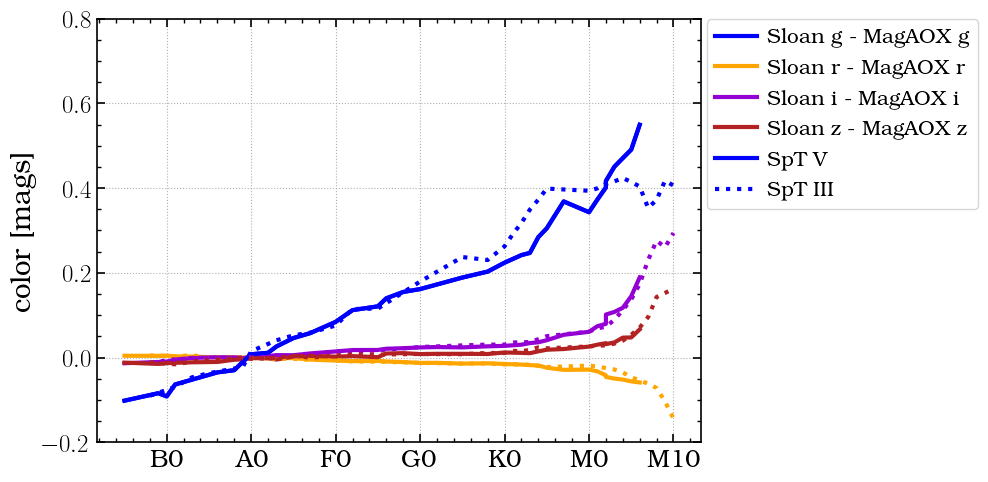

In [35]:
%matplotlib inline
plt.figure(figsize=(10,5))
c=['blue','orange','darkviolet','firebrick']
plt.plot(spt_numbers_dwarfs,[colorDict[s]['Sg-Mg'] for s in dwarfs],color=c[0],label='Sloan g - MagAOX g')
plt.plot(spt_numbers_dwarfs,[colorDict[s]['Sr-Mr'] for s in dwarfs],color=c[1],label='Sloan r - MagAOX r')
plt.plot(spt_numbers_dwarfs,[colorDict[s]['Si-Mi'] for s in dwarfs],color=c[2],label='Sloan i - MagAOX i')
plt.plot(spt_numbers_dwarfs,[colorDict[s]['Sz-Mz'] for s in dwarfs],color=c[3],label='Sloan z - MagAOX z')

plt.plot(spt_numbers_dwarfs,[colorDict[s]['Sg-Mg'] for s in dwarfs],color=c[0],label='SpT V')
plt.plot(spt_numbers_giants,[colorDict[s]['Sg-Mg'] for s in giants],color=c[0],ls=':',label = 'SpT III')
plt.plot(spt_numbers_giants,[colorDict[s]['Sr-Mr'] for s in giants],color=c[1],ls=':')
plt.plot(spt_numbers_giants,[colorDict[s]['Si-Mi'] for s in giants],color=c[2],ls=':')
plt.plot(spt_numbers_giants,[colorDict[s]['Sz-Mz'] for s in giants],color=c[3],ls=':')

plt.ylim(-0.2,0.8)
ticks = np.arange(1,7.5,1)
labels = ['B0','A0','F0','G0','K0','M0','M10']
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(labels)
plt.ylabel('color [mags]')
plt.legend(fontsize=15,loc=(1.01,0.55))
plt.tight_layout()
plt.grid(ls=':')
plt.savefig(directory+'MagAOXfilters_toSDSSfilters_color_conversion.png',dpi=300)
plt.savefig('MagAOXfilters_toSDSSfilters_color_conversion.png',dpi=300)
plt.show()

In [36]:
pickle.dump(colorDict,open('MagAOX-to-SDSS-color-conversion.pkl','wb'))

In [41]:
p_wfs = pd.DataFrame()
keys = [key for key in colorDict.keys()]
p_wfs['SpT'] = keys
p_wfs['SpT numbers'] = spt_numbers
p_wfs['g'],p_wfs['r'],p_wfs['i'],p_wfs['z'] = np.nan,np.nan,np.nan,np.nan
for i,spt in enumerate(keys):
    p_wfs['g'][i] = colorDict[spt]['Sg-Mg']
    p_wfs['r'][i] = colorDict[spt]['Sr-Mr']
    p_wfs['i'][i] = colorDict[spt]['Si-Mi']
    p_wfs['z'][i] = colorDict[spt]['Sz-Mz']
p_wfs

/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_62965/1972275089.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_wfs['g'][i] = colorDict[spt]['Sg-Mg']
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_62965/1972275089.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p_wfs['r'][i] = colorDict[spt]['Sr-Mr']
/var/folders/tm/1xdh6wyn1qv7mhy_c10d5c_w0000gn/T/ipykernel_62965/1972275089.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returnin

,SpT,SpT numbers,g,r,i,z
0,O5V,0.5,-0.101941,0.004162,-0.013546,-0.012108
1,O9V,0.9,-0.084323,0.003911,-0.010577,-0.015160
2,B0V,1.0,-0.091820,0.004249,-0.009704,-0.013370
3,B1V,1.1,-0.063635,0.002837,-0.004904,-0.012529
4,B3V,1.3,-0.052260,0.002272,-0.001051,-0.011331
...,...,...,...,...,...,...
63,M6III,6.6,0.403748,-0.054302,0.173384,0.070705
64,M7III,6.7,0.353084,-0.061697,0.230338,0.095431
65,M8III,6.8,0.372327,-0.072142,0.275738,0.142868
66,M9III,6.9,0.417375,-0.104051,0.260338,0.152327


In [45]:
p_wfs['SpT Number'] = spt_numbers
directory = ''
p_wfs.to_csv(directory+'MagAOXfilters_toSDSSfilters_color_conversion.csv',index=False)

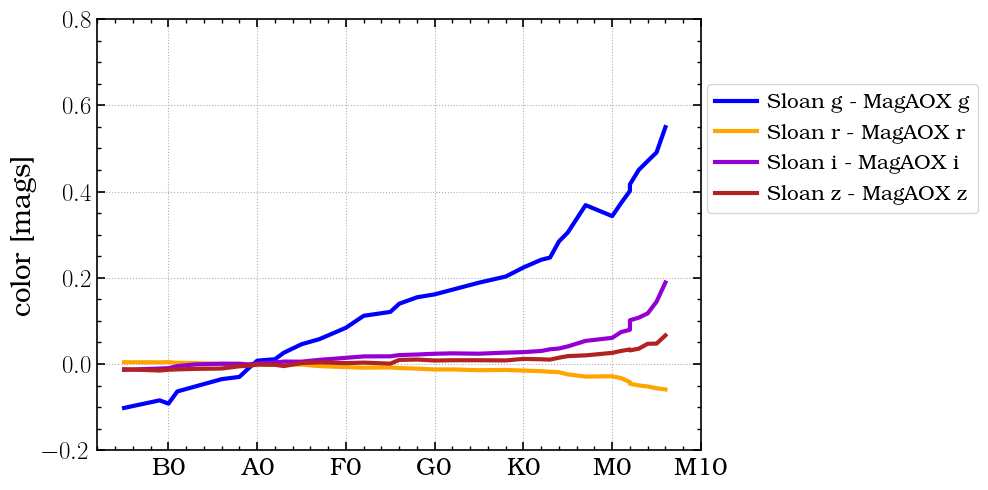

In [44]:
%matplotlib inline
plt.figure(figsize=(10,5))
c=['blue','orange','darkviolet','firebrick']
plt.plot(spt_numbers_dwarfs,[p_wfs.loc[s]['g'] for s in range(len(dwarfs))],color=c[0],label='Sloan g - MagAOX g')
plt.plot(spt_numbers_dwarfs,[p_wfs.loc[s]['r'] for s in range(len(dwarfs))],color=c[1],label='Sloan r - MagAOX r')
plt.plot(spt_numbers_dwarfs,[p_wfs.loc[s]['i'] for s in range(len(dwarfs))],color=c[2],label='Sloan i - MagAOX i')
plt.plot(spt_numbers_dwarfs,[p_wfs.loc[s]['z'] for s in range(len(dwarfs))],color=c[3],label='Sloan z - MagAOX z')


plt.ylim(-0.2,0.8)
ticks = np.arange(1,7.5,1)
labels = ['B0','A0','F0','G0','K0','M0','M10']
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(labels)
plt.ylabel('color [mags]')
plt.legend(fontsize=15,loc=(1.01,0.55))
plt.tight_layout()
plt.grid(ls=':')
# plt.savefig(directory+'MagAOXfilters_toSDSSfilters_color_conversion.png',dpi=300)
# plt.savefig('MagAOXfilters_toSDSSfilters_color_conversion.png',dpi=300)
plt.show()

In [29]:
SDSS_filternames = ['Sz','Si','Sr','Sg']
MagAOX_filternames = ['Mz','Mi','Mr','Mg']
filternames = ['z','i','r','g']

colorDict2 = {}
for spt in spts:
    tempDict = {}
    for j in range(len(SDSS_filternames)):
        avecolor = GetColorWAvgFilterMethod(pickles[spt]['wavelength']*u.AA.to(u.um), pickles[spt]['flux'], 
                           SDSSfilters[j]['wavelength [um]'],
                               SDSSfilters[j]['normalized transmission'],
                        MagAOXfilters[j]['wavelength [m]']*u.m.to(u.um),
                               MagAOXfilters[j]['normalized transmission'],
                                           filt1_sdss = True,
                                           filt1_name = filternames[j])
    
        tempDict.update({SDSS_filternames[j]+'-'+MagAOX_filternames[j]:avecolor})
    colorDict2.update({spt:tempDict})

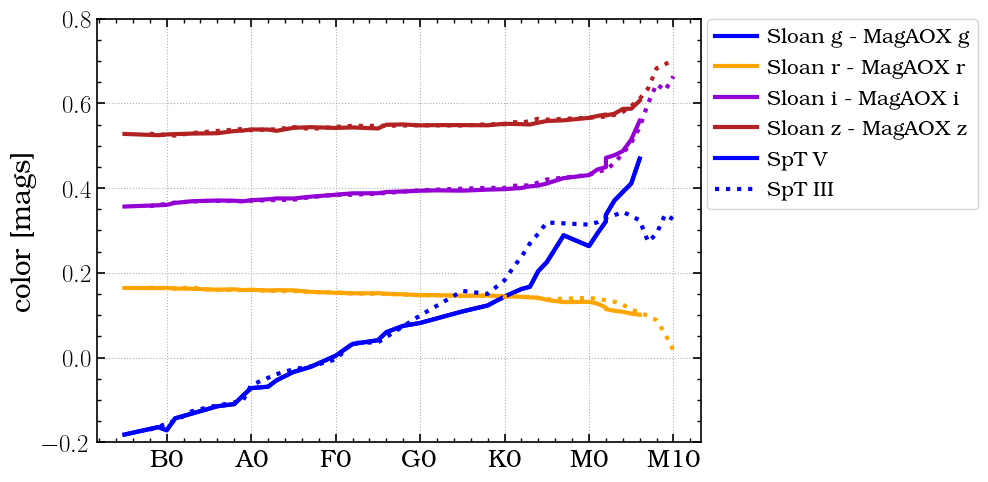

In [30]:
%matplotlib inline
plt.figure(figsize=(10,5))
c=['blue','orange','darkviolet','firebrick']
plt.plot(spt_numbers_dwarfs,[colorDict2[s]['Sg-Mg'] for s in dwarfs],color=c[0],label='Sloan g - MagAOX g')
plt.plot(spt_numbers_dwarfs,[colorDict2[s]['Sr-Mr'] for s in dwarfs],color=c[1],label='Sloan r - MagAOX r')
plt.plot(spt_numbers_dwarfs,[colorDict2[s]['Si-Mi'] for s in dwarfs],color=c[2],label='Sloan i - MagAOX i')
plt.plot(spt_numbers_dwarfs,[colorDict2[s]['Sz-Mz'] for s in dwarfs],color=c[3],label='Sloan z - MagAOX z')

plt.plot(spt_numbers_dwarfs,[colorDict2[s]['Sg-Mg'] for s in dwarfs],color=c[0],label='SpT V')
plt.plot(spt_numbers_giants,[colorDict2[s]['Sg-Mg'] for s in giants],color=c[0],ls=':',label = 'SpT III')
plt.plot(spt_numbers_giants,[colorDict2[s]['Sr-Mr'] for s in giants],color=c[1],ls=':')
plt.plot(spt_numbers_giants,[colorDict2[s]['Si-Mi'] for s in giants],color=c[2],ls=':')
plt.plot(spt_numbers_giants,[colorDict2[s]['Sz-Mz'] for s in giants],color=c[3],ls=':')

plt.ylim(-0.2,0.8)
ticks = np.arange(1,7.5,1)
labels = ['B0','A0','F0','G0','K0','M0','M10']
plt.gca().set_xticks(ticks)
plt.gca().set_xticklabels(labels)
plt.ylabel('color [mags]')
plt.legend(fontsize=15,loc=(1.01,0.55))
plt.tight_layout()
plt.grid(ls=':')
#MagAOplt.savefig(directory+'MagAOXfilters_toSDSSfilters_color_conversion.png',dpi=300)
plt.show()